In [7]:
!pip install opendatasets

In [8]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
import opendatasets as od

In [10]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: binojmadhuranga 
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight


100%|██████████| 20.3k/20.3k [00:00<00:00, 57.5MB/s]

In [11]:
data = pd.read_csv("male-female-height-and-weight/Test set.csv")

**Data Preprocessing**

In [12]:
data.head()


,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [13]:
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Female','Sex']=0

In [14]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [15]:
X = data.drop(['Sex'], axis=1)
y = data['Sex']

In [52]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [53]:
X.head(5)

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [54]:
y.head(5)

,Sex
0,0
1,1
2,1
3,1
4,0


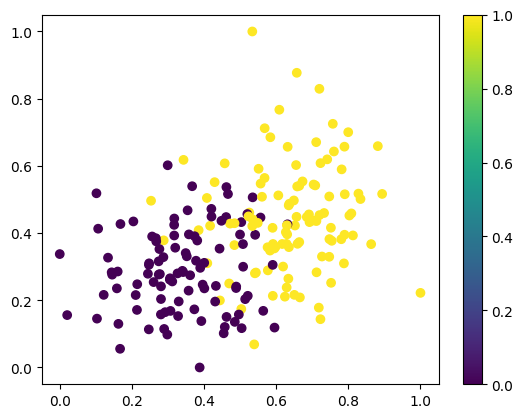

In [55]:
plt.scatter(X['Height'], X['Weight'], c=y)
plt.colorbar()
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train.shape, X_test.shape

((164, 2), (41, 2))

**Model Building**

In [58]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["accuracy"])

# train the model
epoch_number = 20
# Convert y_train to an integer type before fitting the model
history = model.fit(X_train, y_train.astype(int), epochs=epoch_number)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4941 - loss: 0.6837
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5322 - loss: 0.6442 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6467 - loss: 0.5581
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8605 - loss: 0.4784
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8360 - loss: 0.4143
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8535 - loss: 0.3366 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8368 - loss: 0.3346 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8410 - loss: 0.4741
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7382 - loss: 0.5778 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8429 - loss: 0.3488
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8348 - loss: 0.4291 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8484 - loss: 0.3283 
Epoch 13/20

In [59]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,093 (113.65 KB)

 Trainable params: 9,697 (37.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,396 (75.77 KB)

In [60]:
y_pred = model.predict(X_test)
y_pred[:5]

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[0.11827296],
       [0.96053416],
       [0.9825998 ],
       [0.16734657],
       [0.95220274]], dtype=float32)

In [61]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


**Evaluate Model**

In [62]:
y_test = y_test.astype(int)

In [63]:
# Using evaluate method
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9141 - loss: 0.2518 


[0.26565834879875183, 0.9024389982223511]

In [64]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.11827296],
       [0.96053416],
       [0.9825998 ],
       [0.16734657],
       [0.95220274]], dtype=float32)

In [65]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


In [66]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()


<tf.Tensor: shape=(), dtype=float32, numpy=0.8636363744735718>

In [67]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.949999988079071>

<Axes: >

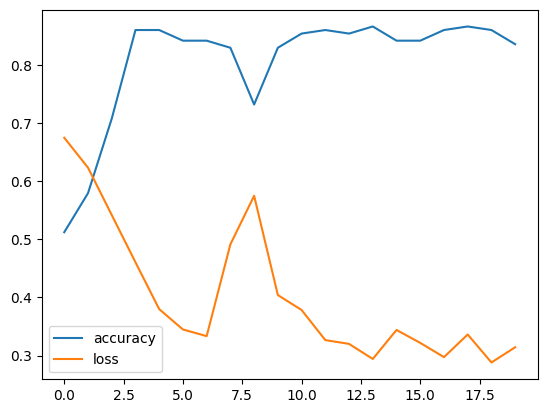

In [68]:
pd.DataFrame(history.history).plot()